In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dimentionality Reduction :

When we mention dimensionality, It means the number of columns you have in your dataset, assuming that you are working on a tidy dataset, such as the Pokemon dataset shown here. 

Make sure every column resembles a variable, or in other words feature, such as the properties of Pokemon like attack and defense in this example. Similarly, each row holds an observation for each variable. The first row gives us all the properties of one specific Pokemon.

When you have many columns in your dataset, say, more than 10, the data is considered high dimensional. To overcome this, we can reduce the number of columns using dimensionality reduction techniques. However, these techniques can also be useful for relatively low dimensional datasets.

#### Why reduce dimensionality?

Reducing the number of dimensions in your dataset has multiple benefits-

- Your dataset will become simpler and thus easier to work with, require less disk space to store and computations will run faster. 
- In addition, models are less likely to overfit on a dataset with fewer dimensions.

### t-SNE(t-distributed stochastic neighbor embedding)

t-SNE is an unsupervised learning method which maps samples from their high-dimensional space into a 2- or 3-dimensional space so they can be visualized. 

While some distortion is inevitable, t-SNE does a great job of approximately representing the distances between the samples. For this reason, t-SNE is an invaluable visual aid for understanding high dimensional data using feature extraction.

In [2]:
ansur_fm = pd.read_csv("ANSUR_II_FEMALE.csv")
ansur_fm.tail()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
1981,Combat Support,Army National Guard,Female,285,1392,335,223,1297,252,196,...,265,370,1002,162,836,83.2,1.687,29.234331,Overweight,Normal
1982,Combat Support,Army National Guard,Female,262,1324,301,202,1204,236,181,...,243,374,958,157,804,71.7,1.613,27.558173,Overweight,Normal
1983,Combat Support,Army National Guard,Female,260,1334,318,213,1259,234,183,...,254,351,970,159,774,76.2,1.644,28.193653,Overweight,Normal
1984,Combat Support,Army National Guard,Female,205,1293,302,199,1207,213,163,...,208,335,952,146,769,63.2,1.616,24.201059,Normal,Normal
1985,Combat Support,Army National Guard,Female,238,1346,308,210,1256,236,188,...,223,394,943,154,797,61.0,1.641,22.652319,Normal,Normal


To get a quick overview of which columns contain little variance, we can use the pandas dataframe .describe() method. By default, .describe() gives us a number of summary statistics for each numeric column.

By default, .describe() ignores the non-numeric columns in a dataset. We can tell .describe() to do the opposite by passing 'number' to the 'exclude' argument. We'll then get summary statistics adapted to non-numeric data.

In [3]:
ansur_fm.describe(exclude = "number")

,Branch,Component,Gender,BMI_class,Height_class
count,1986,1986,1986,1986,1986
unique,3,3,1,3,3
top,Combat Service Support,Regular Army,Female,Overweight,Normal
freq,1256,1020,1986,1037,1497


In [4]:
ansur_fm.shape

(1986, 99)

Our ANSUR female body measurements dataset has 99 dimensions. Before we apply t-SNE we're going to remove all non-numeric columns from the dataset. Because t-SNE does not work with non-numeric data as such. 

In [5]:
non_numeric_cols = ['Branch','Component','Gender','BMI_class','Height_class']

In [6]:
df = ansur_fm.drop(non_numeric_cols, axis = 1)
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,231,1282,301,204,1180,222,177,373,315,263,...,295,850,217,345,942,152,756,65.7,1.560,26.997041
1,194,1379,320,207,1292,225,178,372,272,250,...,254,708,168,329,1032,155,815,53.4,1.665,19.262506
2,183,1369,329,233,1271,237,196,397,300,276,...,269,727,159,367,1035,162,799,66.3,1.711,22.647148
3,261,1356,306,214,1250,240,188,384,364,276,...,302,923,235,371,999,173,818,78.2,1.660,28.378575
4,309,1303,308,214,1210,217,182,378,320,336,...,405,1163,300,380,911,152,762,88.6,1.572,35.853259


### t-SNE

t-SNE stands for "t-distributed stochastic neighbor embedding". It has a complicated name, but it serves a very simple purpose. It maps samples from their high-dimensional space into a 2- or 3-dimensional space so they can visualized. 

While some distortion is inevitable, t-SNE does a great job of approximately representing the distances between the samples. For this reason, t-SNE is an invaluable visual aid for understanding a dataset.


####  t-SNE in sklearn

To start with, import TSNE and create a TSNE object. Apply the fit_transform method to the samples. There are two aspects that deserve special attention: the fit_transform method, and the learning rate.

In [7]:
from sklearn.manifold import TSNE

#### t-SNE learning rate

The learning rate makes the use of t-SNE more complicated than some other techniques. You may need to try different learning rates for different datasets. It is clear, however, when you've made a bad choice, because all the samples will appear bunched together in the scatter plot. Normally it's enough to try a few values between 50 and 200.

High learning rates will cause the algorithm to be more adventurous in the configurations it tries out while low learning rates will cause it to be conservative.

In [8]:
model = TSNE(learning_rate=50)

#### t-SNE has only fit_transform()

t-SNE only has a fit_transform method. As you might expect, the fit_transform method simultaneously fits the model and transforms the data. However, t-SNE does not have separate fit and transform methods. This means that you can't extend a t-SNE map to include new samples. Instead, you have to start over each time.

In [9]:
tsne_features = model.fit_transform(df)
tsne_features

array([[-22.624817  ,  -3.5454304 ],
       [ 28.395172  , -28.012833  ],
       [ 32.205162  ,  -9.449376  ],
       ...,
       [ 10.753945  ,  30.900112  ],
       [-21.85951   ,   1.2360111 ],
       [ -0.30210152, -12.639509  ]], dtype=float32)

In [10]:
tsne_features[:5, :]

array([[-22.624817 ,  -3.5454304],
       [ 28.395172 , -28.012833 ],
       [ 32.205162 ,  -9.449376 ],
       [ 16.180075 ,  19.971447 ],
       [ -2.0487895,  40.519455 ]], dtype=float32)

#### Assigning t-SNE features to our dataset

We'll assign these two dimensions back to our original dataset naming them 'x' and 'y'.

In [11]:
df["x"] = tsne_features[:,0]

In [12]:
df["y"] = tsne_features[:,1]

In [13]:
#df.head()

#### Plotting t-SNE

We can now start plotting this data using seaborn's .scatterplot() method on the x and y columns we just added.

<AxesSubplot:xlabel='x', ylabel='y'>

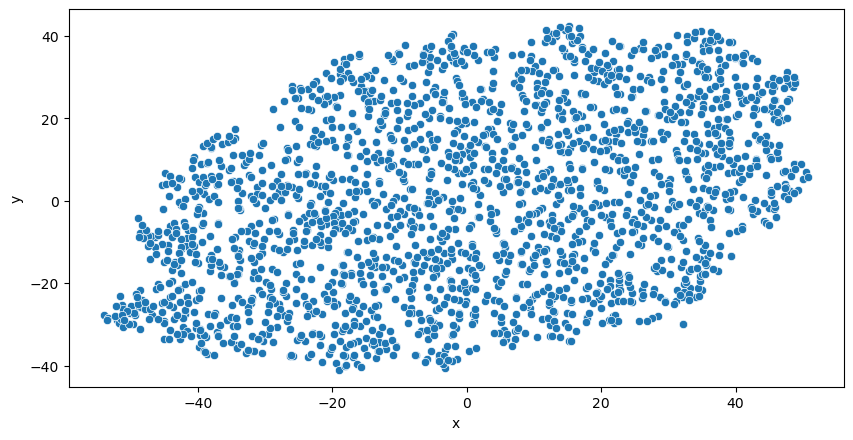

In [14]:
plt.figure(figsize = (10,5), dpi= 100)
sns.scatterplot(x = "x", y = "y", data = df)

The resulting plot shows one big cluster, and in a sense, this could have been expected. There are no distinct groups of female body shapes with little in between, instead, there is a more continuous distribution of body shapes, and thus, one big cluster. However, using the categorical features we excluded from the analysis, we can check if there are interesting structural patterns within this cluster.

In [15]:
non_numeric_cols

['Branch', 'Component', 'Gender', 'BMI_class', 'Height_class']

#### Coloring points according to BMI category

The Body Mass Index or BMI is a method to categorize people into weight groups regardless of their height.

<AxesSubplot:xlabel='x', ylabel='y'>

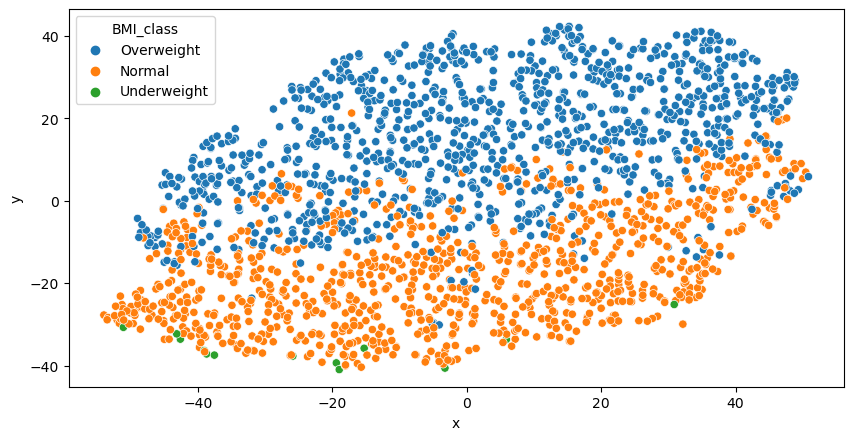

In [16]:
plt.figure(figsize = (10,5), dpi= 100)
sns.scatterplot(x = "x", y = "y",hue = ansur_fm['BMI_class'], data = df)

From the 90+ features in the dataset, TSNE picked up that weight explains a lot of variance in the dataset and used that to spread out points along the x-axis, with underweight people are on the lowerside and overweight people are on upperside of the plot.

#### Coloring points according to height category

<AxesSubplot:xlabel='x', ylabel='y'>

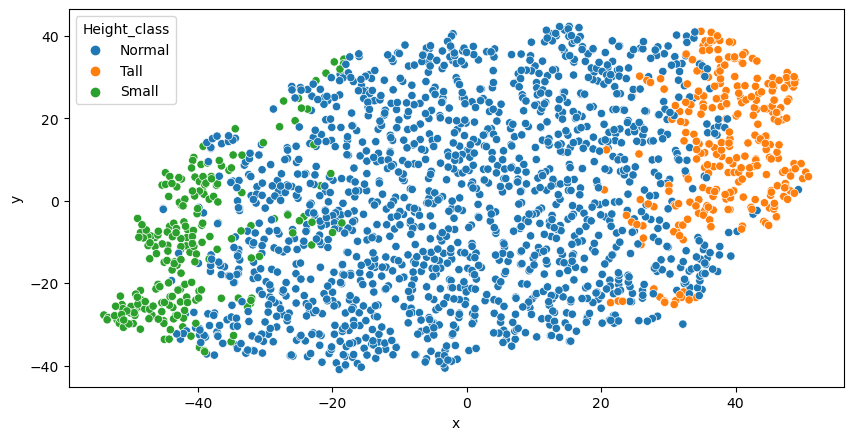

In [17]:
plt.figure(figsize = (10,5), dpi= 100)
sns.scatterplot(x = "x", y = "y",hue = ansur_fm['Height_class'], data = df)

Tall people are at the rightside of the plot and shorter people at the left. In conclusion, t-SNE helped us to visually explore our dataset and identify the most important drivers of variance in body shapes.

#### Different every time

A final thing to be aware of is that the axes of a t-SNE plot do not have any interpretable meaning. In fact, they are different every time t-SNE is applied, even on the same data.

In [18]:
df2 = pd.read_csv("Ansur.csv")
df2

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,Combat Support,Army National Guard,Female,285,1392,335,223,1297,252,196,...,265,370,1002,162,836,83.2,1.687,29.234331,Overweight,Normal
6064,Combat Support,Army National Guard,Female,262,1324,301,202,1204,236,181,...,243,374,958,157,804,71.7,1.613,27.558173,Overweight,Normal
6065,Combat Support,Army National Guard,Female,260,1334,318,213,1259,234,183,...,254,351,970,159,774,76.2,1.644,28.193653,Overweight,Normal
6066,Combat Support,Army National Guard,Female,205,1293,302,199,1207,213,163,...,208,335,952,146,769,63.2,1.616,24.201059,Normal,Normal


In [19]:
df2.describe(exclude="number")

,Branch,Component,Gender,BMI_class,Height_class
count,6068,6068,6068,6068,6068
unique,3,3,2,3,3
top,Combat Service Support,Regular Army,Male,Overweight,Normal
freq,3174,3140,4082,4049,3386


In [20]:
non_numeric = ['Branch','Component','Gender','BMI_class','Height_class']

In [21]:
df_numeric = df2.drop(non_numeric, axis=1)
df_numeric

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,266,1467,337,222,1347,253,202,401,369,274,...,329,933,240,440,1054,175,853,81.5,1.776,25.838761
1,233,1395,326,220,1293,245,193,394,338,257,...,316,870,225,371,1054,167,815,72.6,1.702,25.062103
2,287,1430,341,230,1327,256,196,427,408,261,...,329,964,255,411,1041,180,831,92.9,1.735,30.861480
3,234,1347,310,230,1239,262,199,401,359,262,...,315,857,205,399,968,176,793,79.4,1.655,28.988417
4,250,1585,372,247,1478,267,224,435,356,263,...,303,868,214,379,1245,188,954,94.6,1.914,25.823034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,285,1392,335,223,1297,252,196,368,299,312,...,334,1043,265,370,1002,162,836,83.2,1.687,29.234331
6064,262,1324,301,202,1204,236,181,378,294,287,...,334,971,243,374,958,157,804,71.7,1.613,27.558173
6065,260,1334,318,213,1259,234,183,363,332,299,...,335,982,254,351,970,159,774,76.2,1.644,28.193653
6066,205,1293,302,199,1207,213,163,376,276,280,...,298,837,208,335,952,146,769,63.2,1.616,24.201059


In [22]:
# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate = 50)

In [23]:
# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(6068, 2)


In [24]:
df_numeric["x"] = tsne_features[:,0]

In [25]:
df_numeric["y"] = tsne_features[:,1]

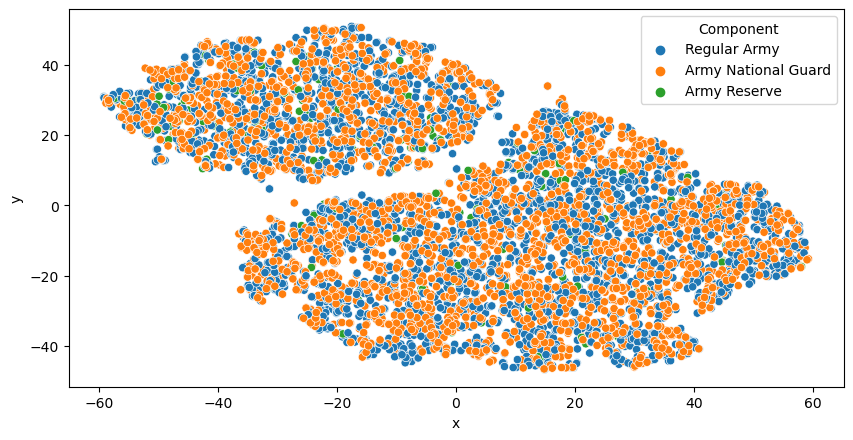

In [26]:
# Color the points according to Army Component
plt.figure(figsize = (10,5), dpi= 100)
sns.scatterplot(x="x", y="y", hue=df2["Component"], data=df_numeric)

# Show the plot
plt.show()

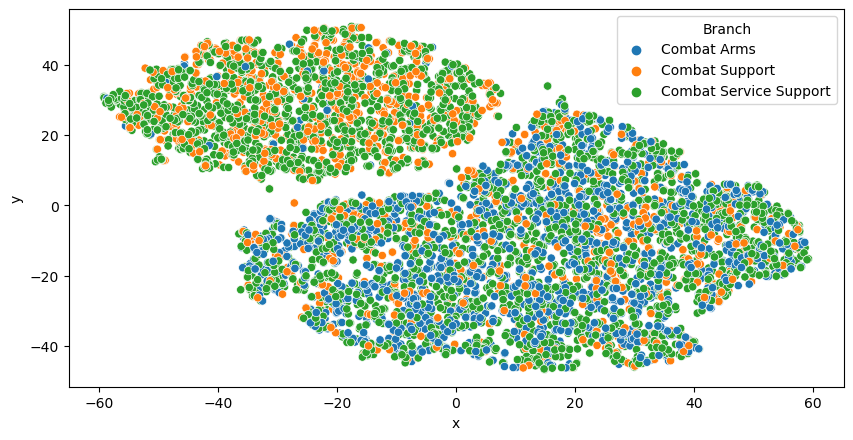

In [27]:
# Color the points by Army Branch
plt.figure(figsize = (10,5), dpi= 100)
sns.scatterplot(x="x", y="y", hue=df2["Branch"], data=df_numeric)

# Show the plot
plt.show()

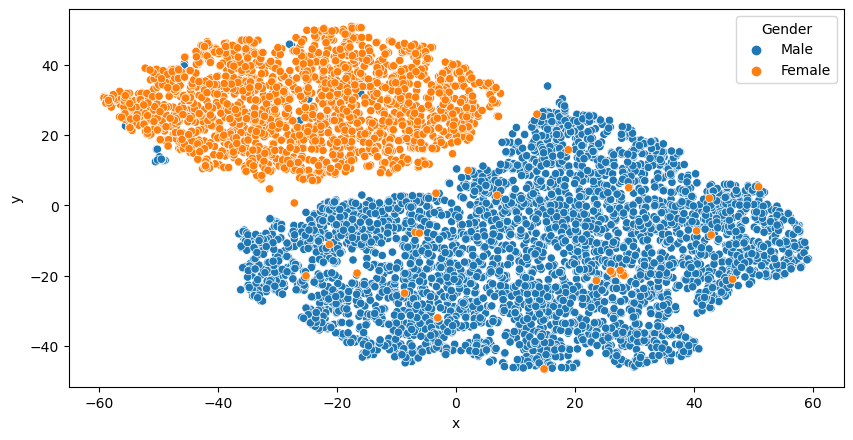

In [28]:
# Color the points by Gender
plt.figure(figsize = (10,5), dpi= 100)
sns.scatterplot(x="x", y="y", hue=df2["Gender"], data=df_numeric)

# Show the plot
plt.show()

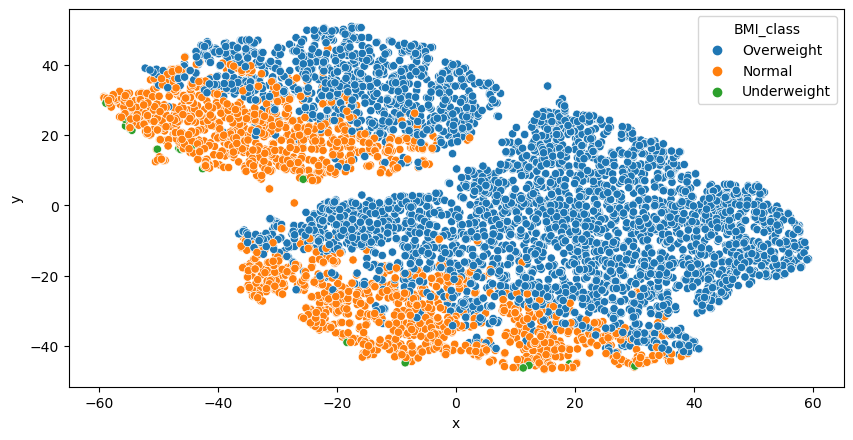

In [29]:
# Color the points by Gender
plt.figure(figsize = (10,5), dpi= 100)
sns.scatterplot(x="x", y="y", hue=df2['BMI_class'], data=df_numeric)

# Show the plot
plt.show()

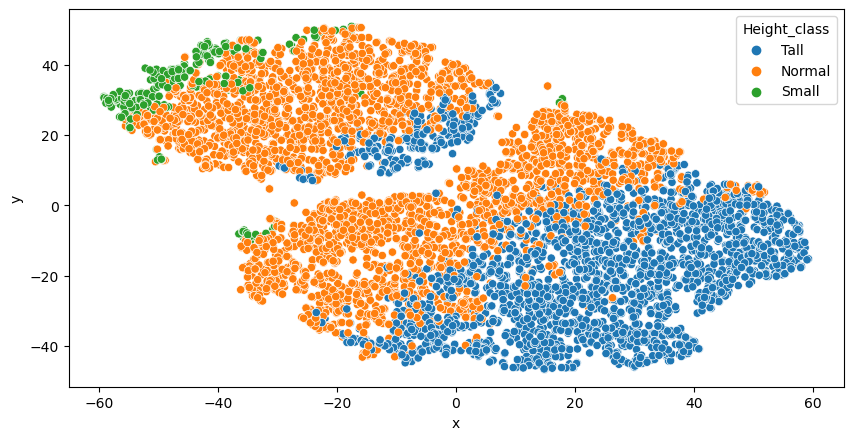

In [30]:
# Color the points by Gender
plt.figure(figsize = (10,5), dpi= 100)
sns.scatterplot(x="x", y="y", hue=df2['Height_class'], data=df_numeric)

# Show the plot
plt.show()

#### t-SNE on the iris dataset

To see what sorts of insights are possible with t-SNE, let's look at how it performs on the grains dataset.  Now t-SNE was given only the measurements of the iris samples. In particular it wasn't given any information about the three species of iris. But if we color the species differently on the scatter plot, we see that t-SNE has kept the species separate.

In [31]:
grains_df = pd.read_csv("grains.csv")
grains_df.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class,name
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,kama wheat


In [32]:
X = grains_df.drop(["class", "name"], axis = 1)

In [34]:
X.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [35]:
y = grains_df["class"]
y.unique()

array([1, 2, 3], dtype=int64)

The grain samples are in a 7 dimensional space (X), where each dimension corresponds to one of the 7 grain measurements, such as area, perimeter, compactness etc

In [36]:
# Create a TSNE instance: model
model_T = TSNE(learning_rate = 200)

In [37]:
# Apply fit_transform to samples: tsne_features
tsne_features = model_T.fit_transform(X)

In [38]:
tsne_features

array([[ -3.6438932 ,  -0.80278647],
       [ -4.5357537 ,   1.6981412 ],
       [ -0.30999896,   0.82081115],
       [  0.15274084,   2.389377  ],
       [ -5.71377   ,  -0.7223615 ],
       [ -0.9315197 ,   0.8934454 ],
       [ -0.08985463,  -2.204742  ],
       [  0.2653314 ,   1.2329235 ],
       [ -5.7875357 ,  -2.7842891 ],
       [ -5.648369  ,  -2.1126509 ],
       [ -2.1436536 ,  -5.7654223 ],
       [ -1.6039412 ,   2.605471  ],
       [  2.2184799 ,  -1.0744345 ],
       [  1.5699474 ,   0.71982276],
       [  1.3383943 ,   1.3301824 ],
       [  1.3131455 ,  -2.6738915 ],
       [  7.2472396 ,  13.630639  ],
       [ -5.035671  ,  -0.14968958],
       [ -2.3788805 ,   1.5674253 ],
       [  7.113318  ,   9.349625  ],
       [  0.52865   ,  -0.2774317 ],
       [  0.06592582,   0.61337954],
       [ -5.8926272 ,   0.35939047],
       [  2.2155619 ,   6.580005  ],
       [ -3.885694  ,   0.6317671 ],
       [ -6.1753697 ,  -0.3517285 ],
       [  5.2643495 ,   4.51454   ],
 

In [39]:
# Select the 0th feature: xs
xs = tsne_features[:,0]
#xs

In [40]:
# Select the 1st feature: ys
ys = tsne_features[:,1]
#ys

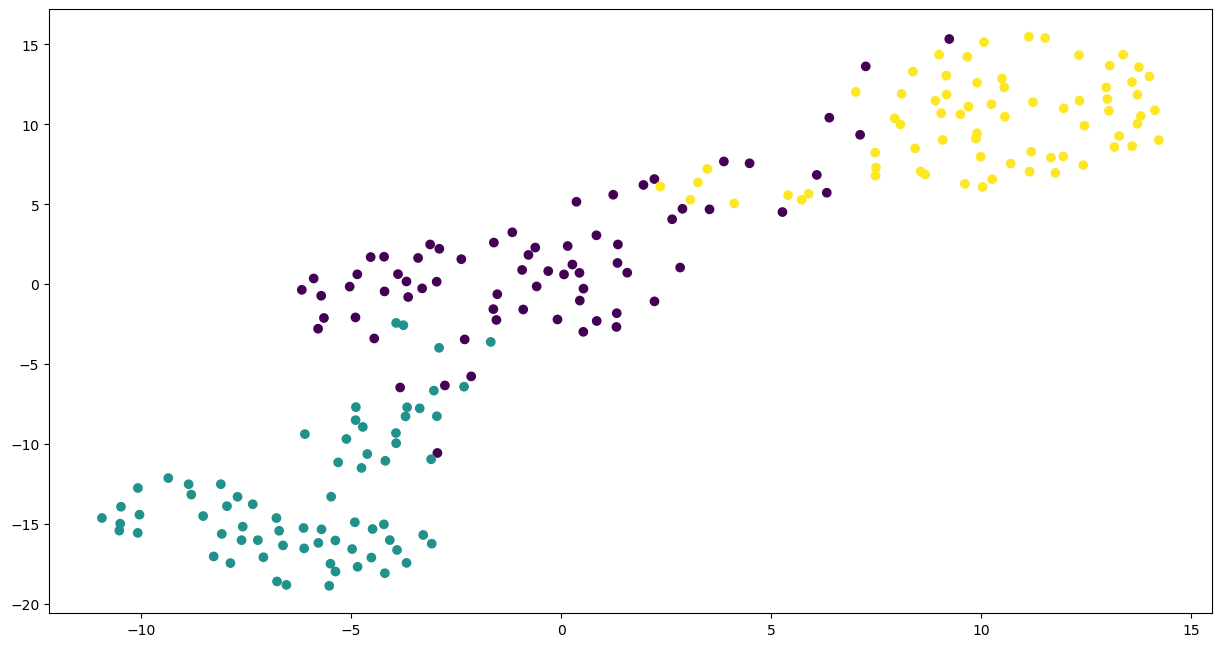

In [41]:
# Scatter plot, coloring by variety_numbers
plt.figure(figsize = (15,8), dpi= 100)
plt.scatter(xs,ys, c = y)
plt.show()

here, we gave t-SNE only the measurements of the grain samples. In particular we did not give any information about the three species of grains('kama wheat', 'rosa wheat', 'canadian wheat'). 

But when we colored the species differently on the scatter plot, we see that t-SNE kept these 3 species separate.



#### Different every time

A final thing to be aware of is that the axes of a t-SNE plot do not have any interpretable meaning. In fact, they are different every time t-SNE is applied, even on the same data.

Note that though the orientation of the plots will be different each time, but they'll always have the same position relative to one another.